10주차: 09장 데이터분석 프로젝트

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [331]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [332]:
pd.set_option('display.precision', 2)

In [333]:
%config InlineBackend.figure_format = 'retina'

In [334]:
!pip install pyreadstat

In [335]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta6.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [336]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [337]:
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

In [338]:
welfare = welfare.rename(columns= {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [339]:
welfare.birth.dtypes

dtype('float64')

In [340]:
welfare.birth.isna().sum()

0

In [341]:
welfare.sex.isna().sum()

0

In [342]:
welfare['sex'] = np.where(welfare.sex == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

In [343]:
welfare.sex.value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

In [344]:
plt.rcParams.update({'figure.figsize': [5, 3] })  # 앞으로 그리는 그래프의 기본 크기를 "가로 5인치, 세로 3인치"로 바꾼다는 뜻입니다.

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

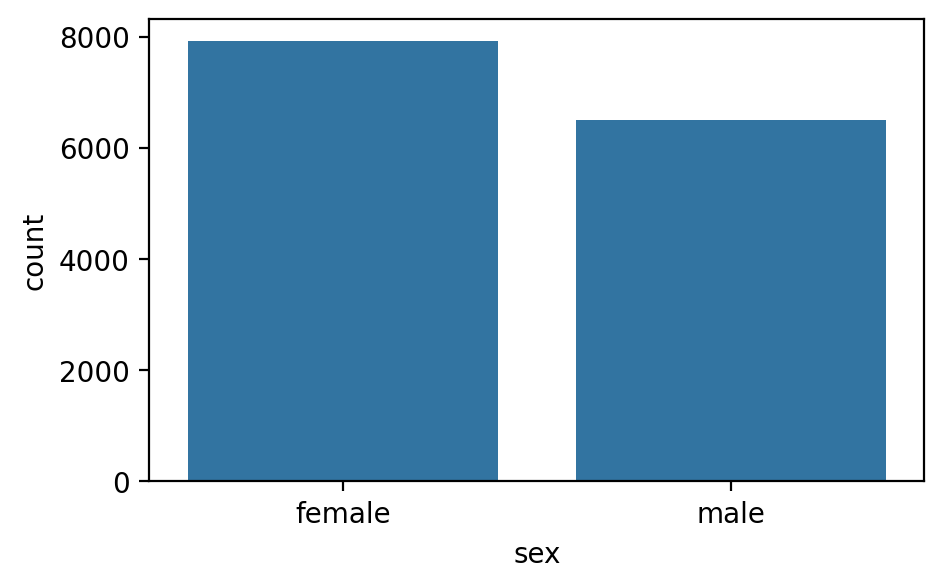

In [345]:
sns.countplot(welfare, x='sex');  # sns.countplot은 막대그래프 그릴때 사용함!!

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

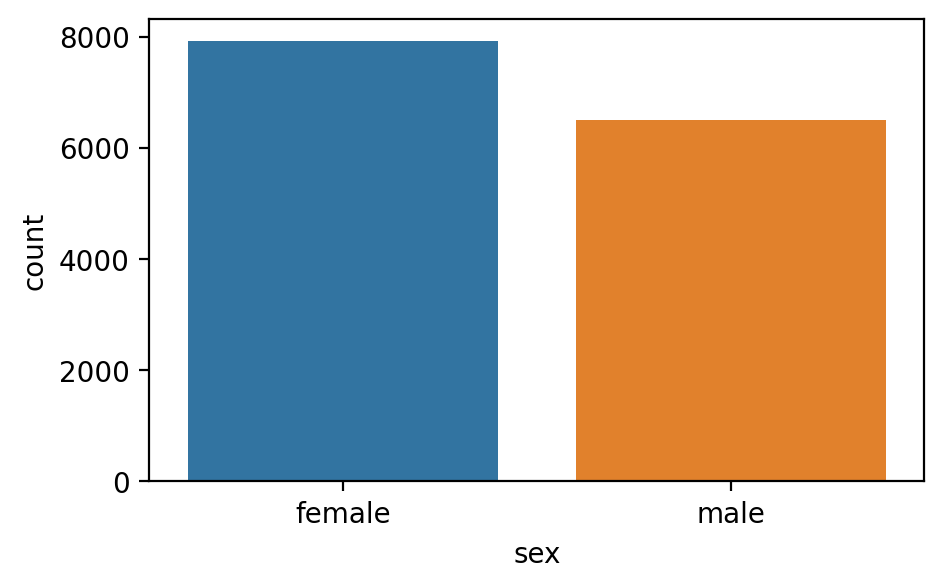

In [346]:
sns.countplot(welfare, x='sex', hue='sex'); # hue는 범주형 변수로 색깔을 구분할 때 사용함!

In [347]:
welfare.income.dtypes

dtype('float64')

In [348]:
welfare.income.describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

In [349]:
welfare.income.isna().sum()

9884

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

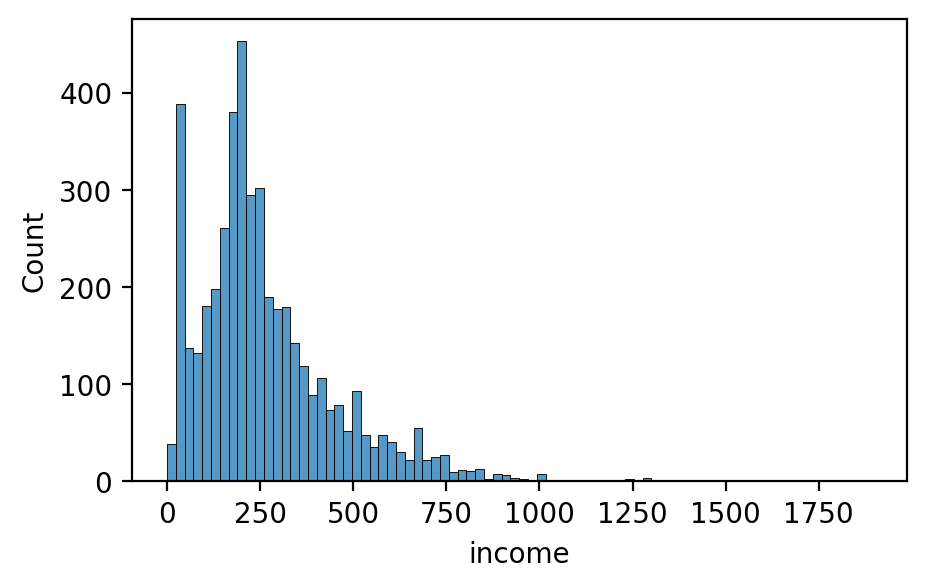

In [350]:
sns.histplot(welfare, x='income');      # bins를 지정하지 않으면, matplotlib/seaborn은 데이터 수와 분산 등을 고려해 적절한 bin 개수를 자동으로 선택해요.

In [351]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

# 'income' 열을 기준으로 값이 비어 있는 행만 삭제하겠다!
# subset은 dropna() 함수 안에서만 사용하는 옵션이에요.
# subset 의 역할을 쉽게 기억하는법? --> 전체집합이 아닌 부분집합을 선택한다는 의미로 기억!
# 행번호(index) 대신 sex 열로 표시한다 → 딱 그 뜻이에요!
# 1행 등호 오른쪽 의미? --> welfare 의 결측치를 제거하겠다! 단, income 이라는 subset(부분집합)에 대해서!
# . 의해석?--> 전의 결과에 대해 ... 로 해석!

# dropna(subset=['income'])를 쓰면,
# 'income' 열에 NaN이 있는 행(row) 전체가 통째로 삭제돼요.
# 'sex' 열을 기준으로 남자끼리, 여자끼리 나눈다
# .groupby()만 하면 아직 데이터프레임이 아니고,
# 그룹만 묶어놓은 중간 상태(GroupBy 객체)예요.

# .groupby()가 왜 출력을 안하는지? --> dropna와 비교 생각하면 해결됨!
# .groupby('sex', as_index=False) 는 sex 라는 열의 항목들을 하나당 행 하나로 만드는 역할이다!!!

# 'income' 열의 값을 가지고
# → 평균('mean')을 구해서
# → 결과를 'mean_income'이라는 새로운 열 이름으로 저장하라는 뜻이에요.
# → 그리고 이 계산은 이미 groupby('sex')로 묶인 각 그룹별로 실행돼요!

# 기억 Tip? --> .groupby() 시 출력은 안되지만 마음속으로 생성되는 표를 생각해라!

,sex,mean_income
0,female,186.29
1,male,349.04


In [352]:
sex_income2 = welfare.groupby('sex', as_index=False) \
                     .agg(mean_income = ('income', 'mean'))
sex_income2

# Pandas의 'mean' 함수는 기본적으로 NaN을 자동으로 제외하고 평균을 계산합니다.
# 👉 즉, dropna를 하지 않아도 NaN은 무시하고 평균을 내요.

# cf) count()는 NaN을 세지 않습니다.
# dropna(subset=['income'])는 계산에는 필수가 아니지만,
# 더 깔끔하고 정확한 데이터 상태로 분석을 시작하기 위해 쓰는 거예요!


,sex,mean_income
0,female,186.29
1,male,349.04


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

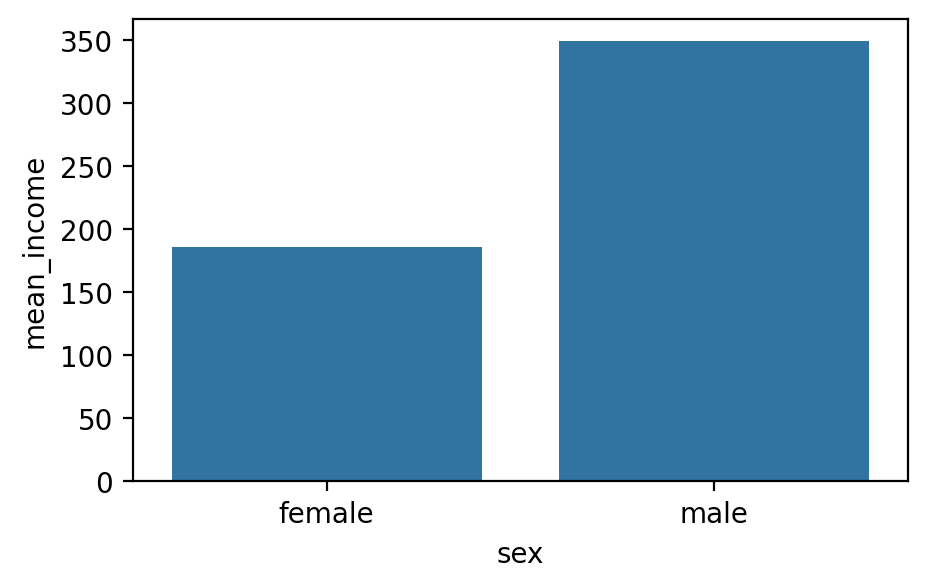

In [353]:
sns.barplot(sex_income, x='sex', y='mean_income');

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

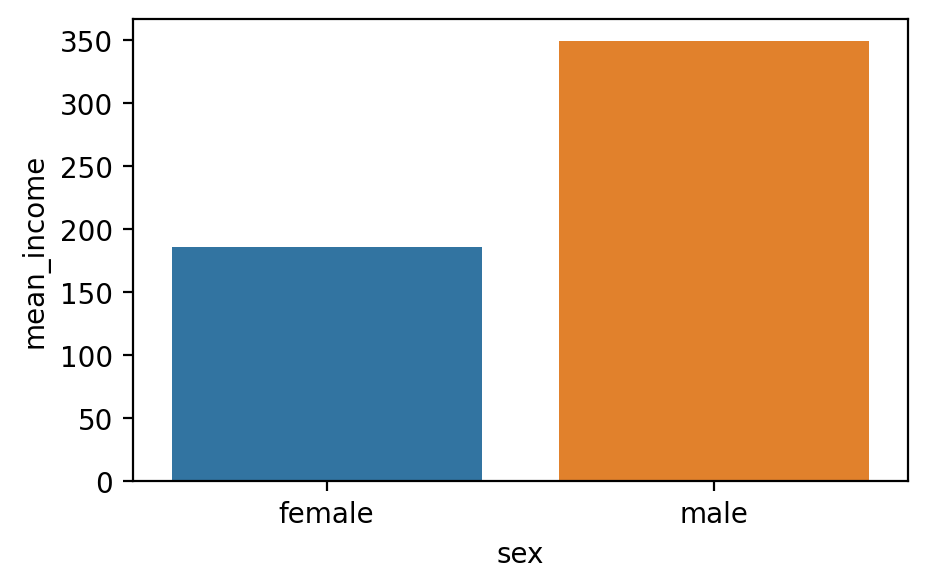

In [354]:
sns.barplot(sex_income, x='sex', y='mean_income', hue='sex');

## 나이와 월급의 관계

In [355]:
welfare.birth.describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

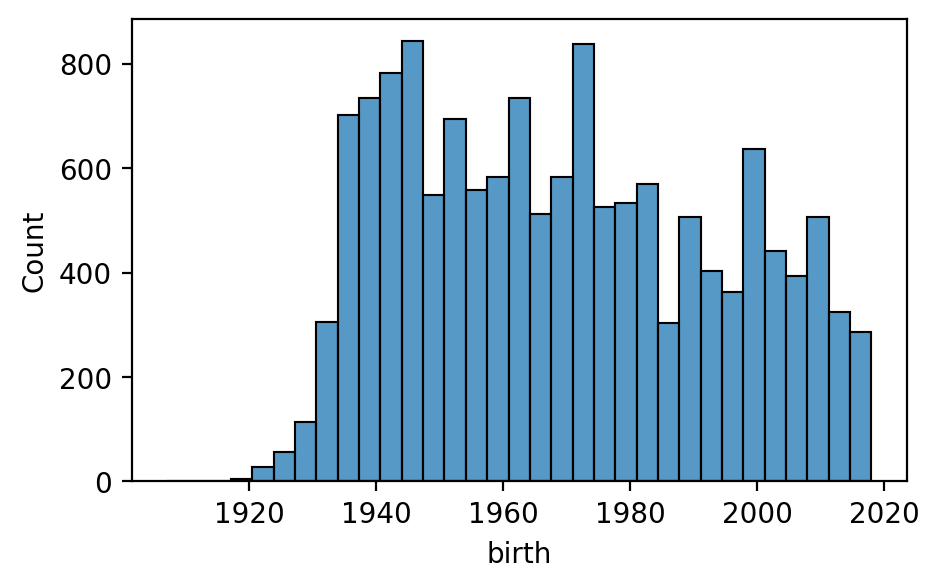

In [356]:
sns.histplot(welfare, x='birth');

In [357]:
welfare.birth.isna().sum()

0

In [358]:
welfare[welfare.birth == 9999]

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5


In [359]:
welfare = welfare.assign(age = 2019 - welfare['birth'])
welfare.age.describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

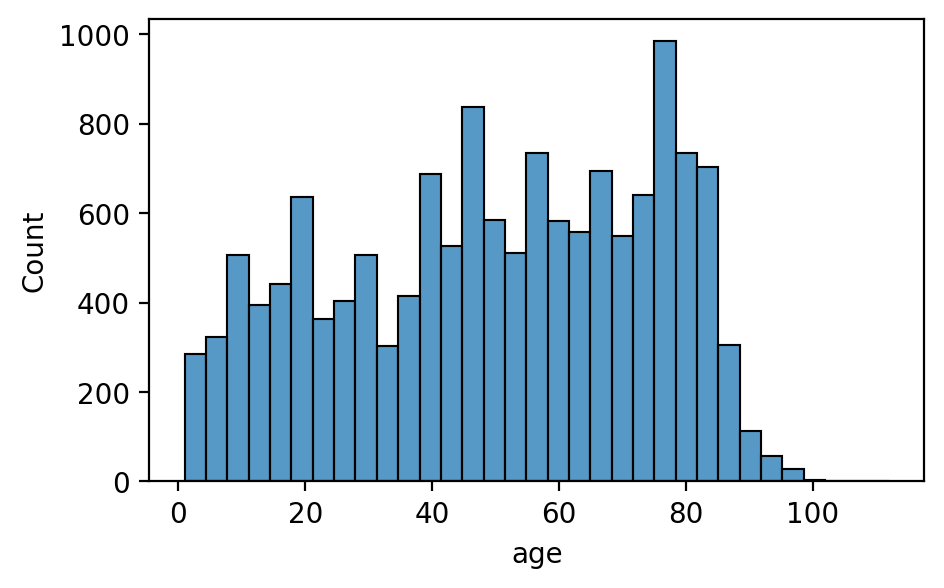

In [360]:
sns.histplot(welfare, x='age');

In [361]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income

# .groupby('sex', as_index=False) 는 sex 라는 열의 항목들을 하나당 행 하나로 만드는 역할이다!!!
# Pandas의 .groupby() 함수에서 as_index의 **기본값은 True**입니다.
# **age는 인덱스(index)**, **mean_income은 열(column)**이기 때문에,
# 👉 서로 다른 위치(정렬 기준)로 보이는 게 정상입니다!
# 3행의 의미? --> 주어진 데이터에서(. 왼쪽 데이터에서) income 이라는 열의 평균값을 구해서 mean_income이라는 열에 하나씩 저장하라는 것!(groupby 먼저 인식 필수!)


,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68
...,...
86.0,45.40
87.0,27.00
88.0,27.00


In [362]:
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

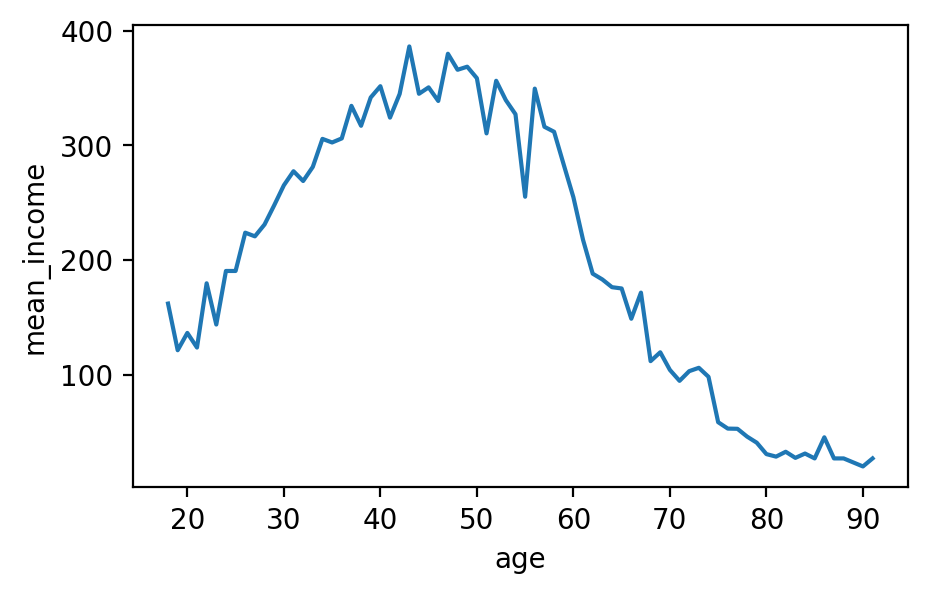

In [363]:
sns.lineplot(age_income, x='age', y='mean_income');

In [364]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))
welfare.ageg.value_counts()

# value_counts()는 기본적으로 NaN을 세지 않습니다.
# 👉 즉, 결측값(NaN)은 자동으로 무시되고 제외돼요.

ageg
old       5742
middle    5067
young     3609
Name: count, dtype: int64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

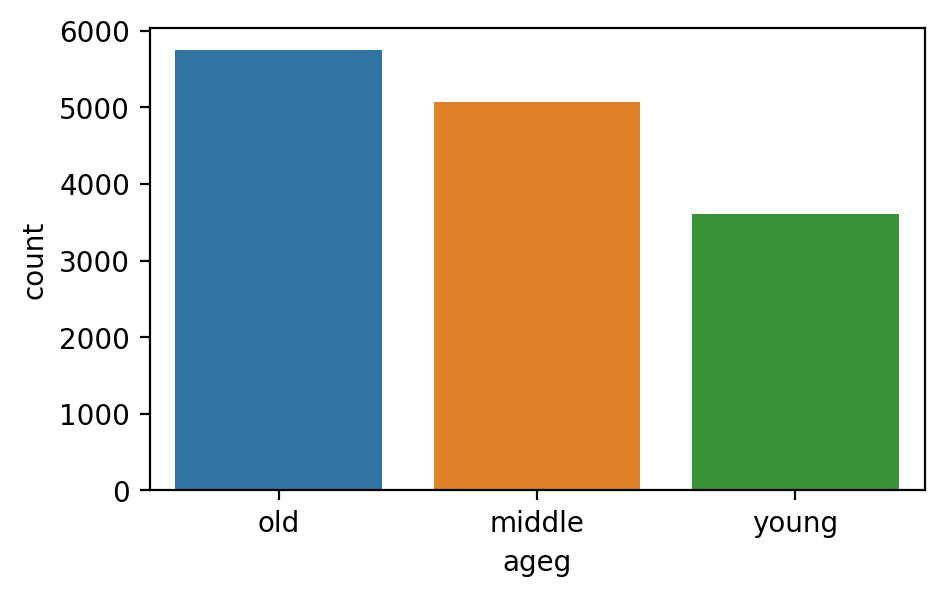

In [365]:
sns.countplot(welfare, x='ageg', hue='ageg');

In [366]:
ageg_income = welfare.dropna(subset = ['income']) \
                    .groupby('ageg', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.71
1,old,126.14
2,young,202.60


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

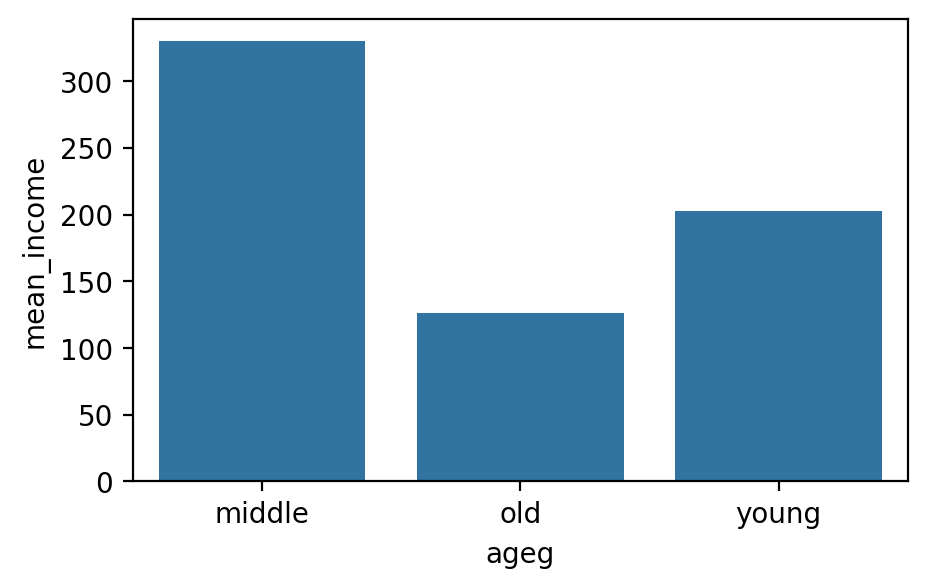

In [367]:
sns.barplot(ageg_income, x='ageg', y='mean_income');

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

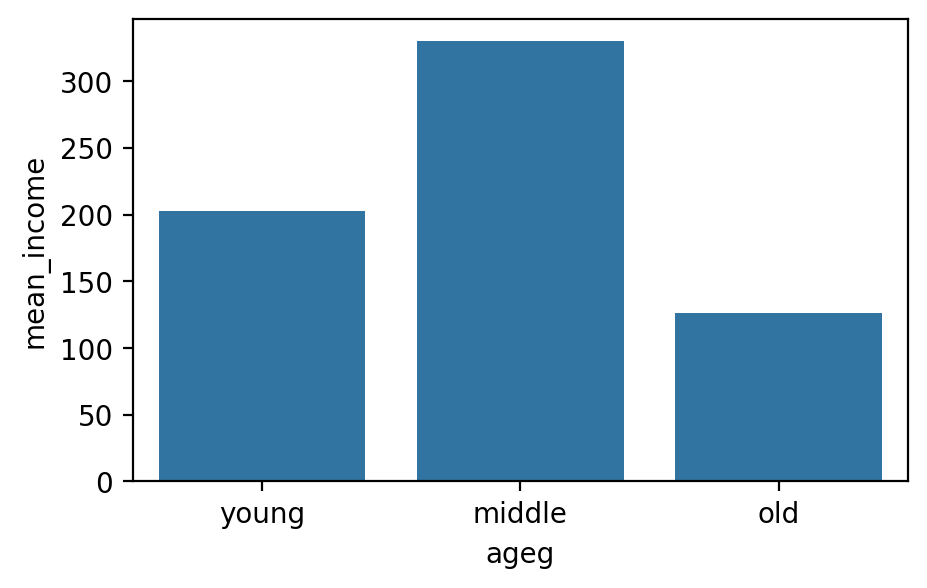

In [368]:
sns.barplot(ageg_income, x='ageg', y='mean_income', order= ['young', 'middle', 'old']);

### 10주차 종료

# 11주차 9-5, 5/26(월) 수업 시작

## 연령대 및 성별 월급 차이

In [369]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,229.03
1,middle,male,410.50
2,old,female,84.32
3,old,male,183.75
4,young,female,193.76
5,young,male,215.95


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

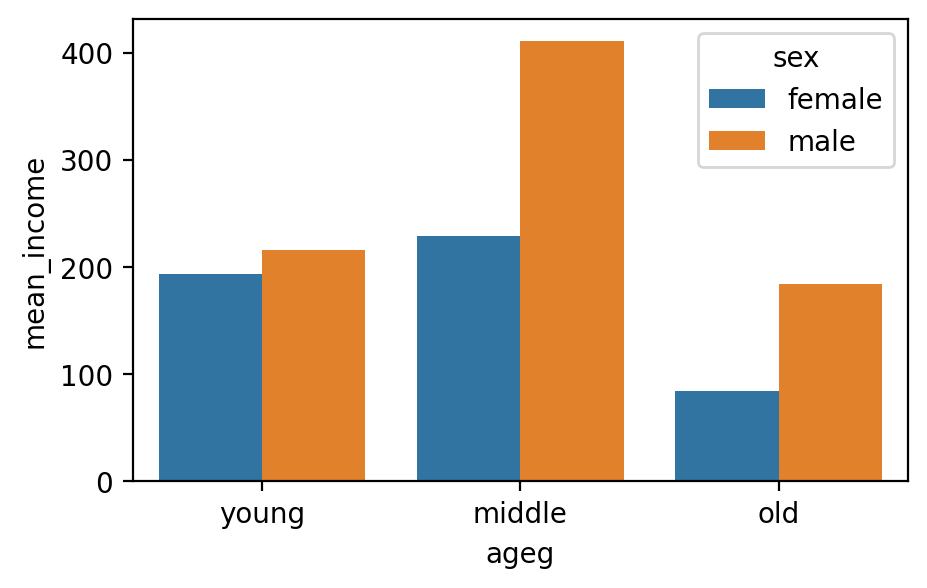

In [370]:
sns.barplot(sex_income, x='ageg', y='mean_income', hue='sex', 
            order = ['young', 'middle', 'old']);

In [371]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,18.0,male,162.00
1,19.0,female,87.67
2,19.0,male,155.00
3,20.0,female,124.00
4,20.0,male,186.00


In [372]:
sex_age.tail()

,age,sex,mean_income
139,88.0,female,27.0
140,88.0,male,27.0
141,90.0,female,27.0
142,90.0,male,13.0
143,91.0,female,27.0


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

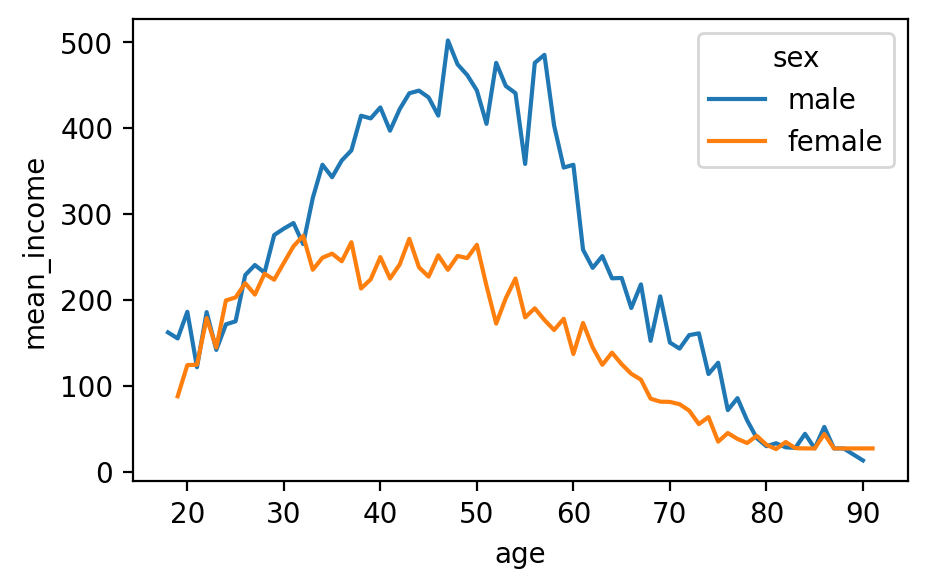

In [373]:
sns.lineplot(sex_age, x='age', y='mean_income', hue='sex');

## 직업별 월급 차이

In [374]:
welfare['code_job'].dtypes

dtype('float64')

In [375]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [376]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [377]:
list_job.shape

(156, 2)

In [437]:
print(welfare.columns)


Index(['h14_id', 'h14_ind', 'h14_sn', 'h14_merkey', 'h_new', 'h14_cobf',
       'p14_wsc', 'p14_wsl', 'p14_wgc', 'p14_wgl',
       ...
       'h14_pers_income1', 'h14_pers_income2', 'h14_pers_income3',
       'h14_pers_income4', 'h14_pers_income5', 'age', 'ageg', 'job',
       'marriage', 'region'],
      dtype='object', length=835)


In [440]:
welfare = welfare.merge(list_job, how='left')
welfare

# 학생표.merge(점수표, how='left') 라는 코드 자체에서 left 는 학생표니까 학생표를 left 에 두고 나머지를 오른쪽에 둔다 적 사고

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,ageg,job,marriage,region
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,NaN,NaN,0.0,NaN,74.0,old,NaN,etc,서울
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,NaN,NaN,0.0,NaN,71.0,old,NaN,etc,서울
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,1284.0,NaN,0.0,NaN,77.0,old,전기공,divorce,서울
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,2304.0,NaN,1800.0,0.0,NaN,57.0,middle,금속기계 부품 조립원,marriage,서울
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,NaN,NaN,NaN,0.0,NaN,56.0,middle,NaN,marriage,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,52.0,middle,NaN,marriage,대전/충남
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,27.0,young,NaN,etc,대전/충남
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,208.0,NaN,0.0,NaN,24.0,young,건설 및 광업 단순 종사자,etc,대전/충남
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1200.0,NaN,0.0,NaN,21.0,young,보건 의료 관련 종사자,etc,대전/충남


In [379]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [380]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                 .groupby(['job'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [381]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

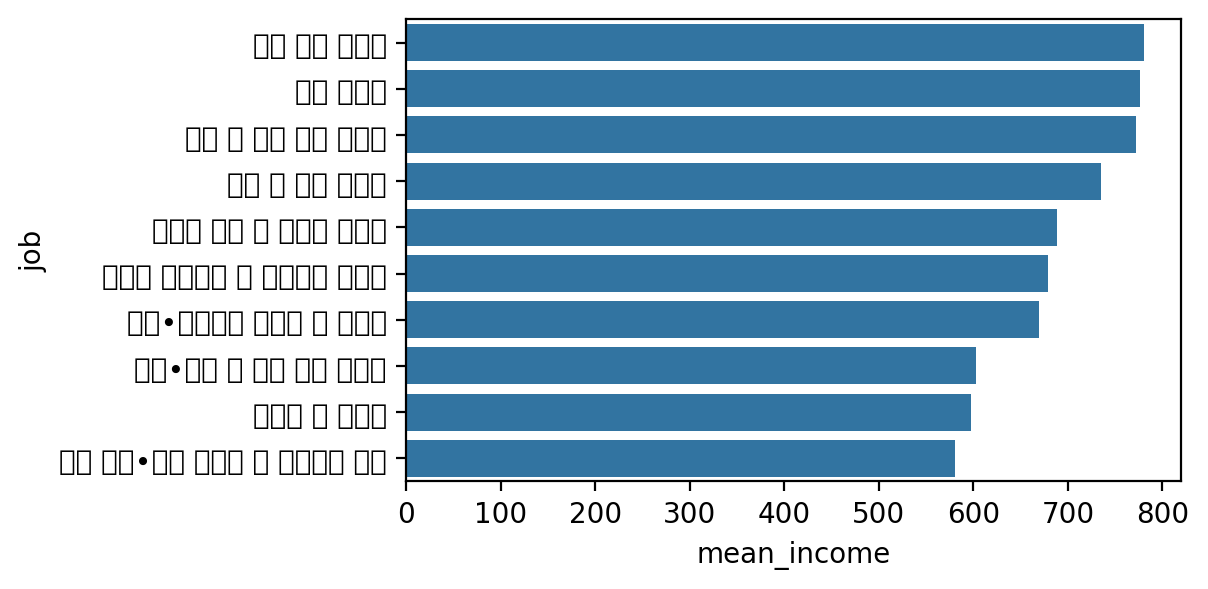

In [382]:
sns.barplot(top10, x='mean_income', y='job');

In [ ]:
btm10 = job_income.sort_values('mean_income').head(10)
btm10

# Pandas에서 sort_values()의 **기본 정렬 방향은 오름차순(ascending)**입니다.

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs

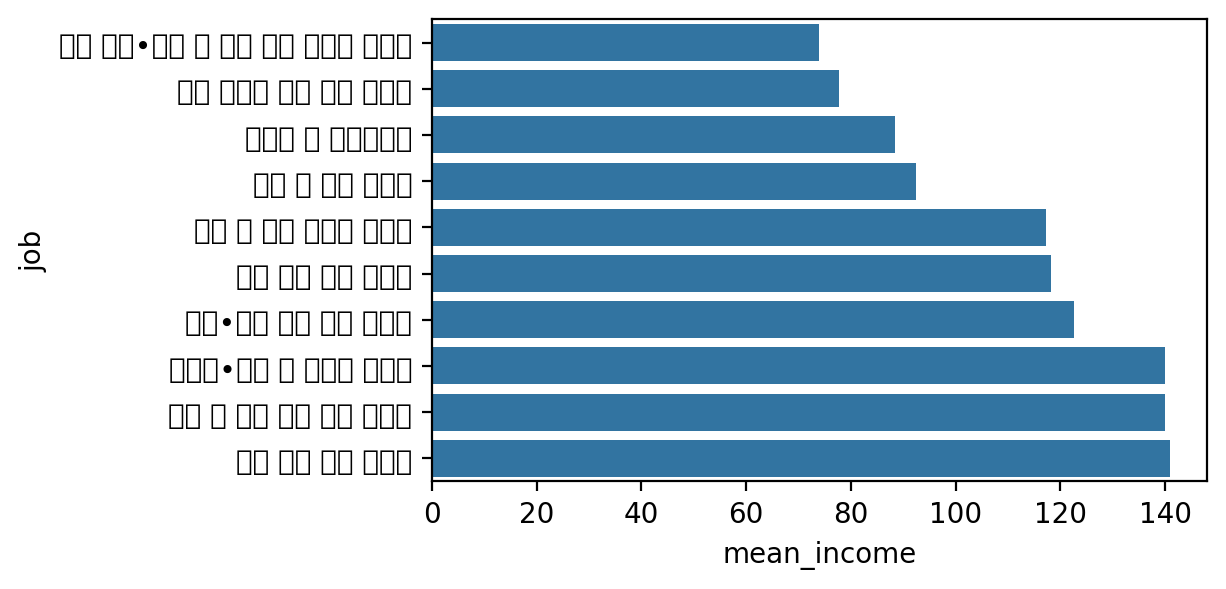

In [384]:
sns.barplot(btm10, x='mean_income', y='job');

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

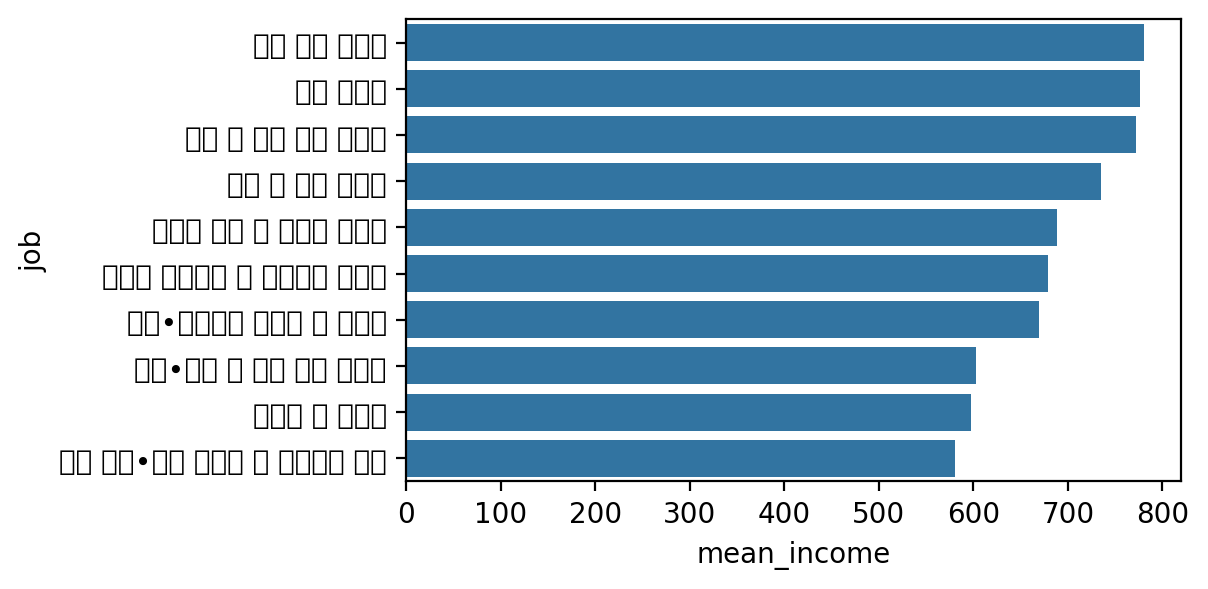

In [385]:
sns.barplot(top10, x='mean_income', y='job');

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

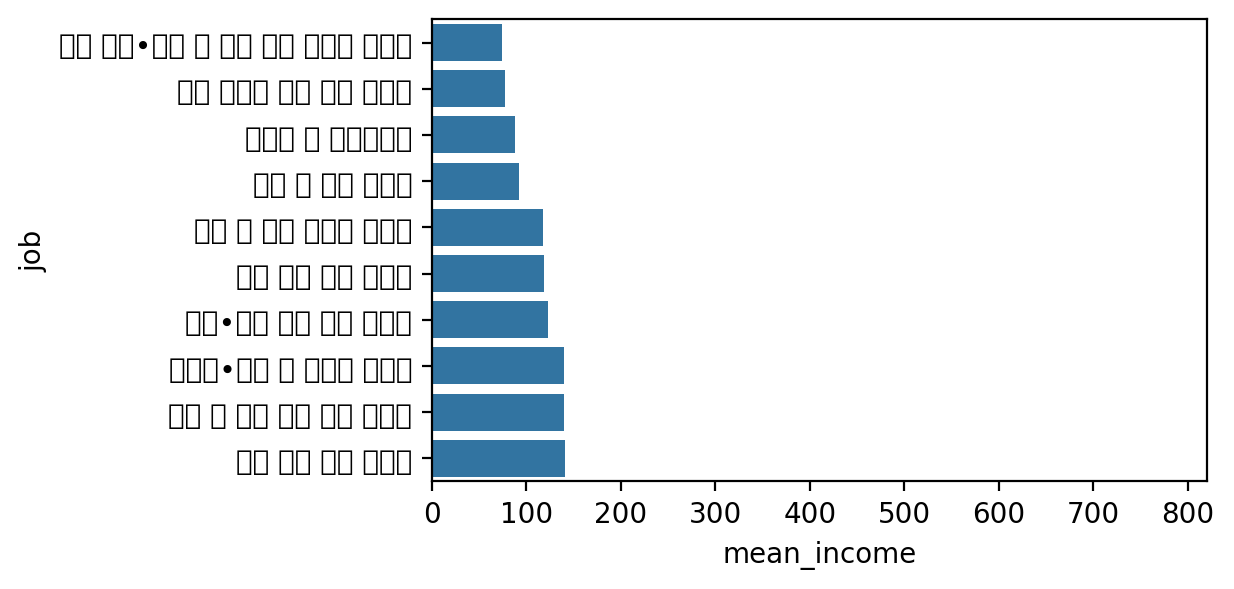

In [441]:
sns.barplot(btm10, x='mean_income', y='job').set(xlim=[0, 820]);

## 성별 직업 빈도

In [387]:
job_male = welfare.dropna(subset=['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg( n = ('job', 'count')) \
                  .sort_values('n', ascending=False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [388]:
job_female = welfare.dropna(subset=['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index=False) \
                  .agg( n = ('job', 'count')) \
                  .sort_values('n', ascending=False) \
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP

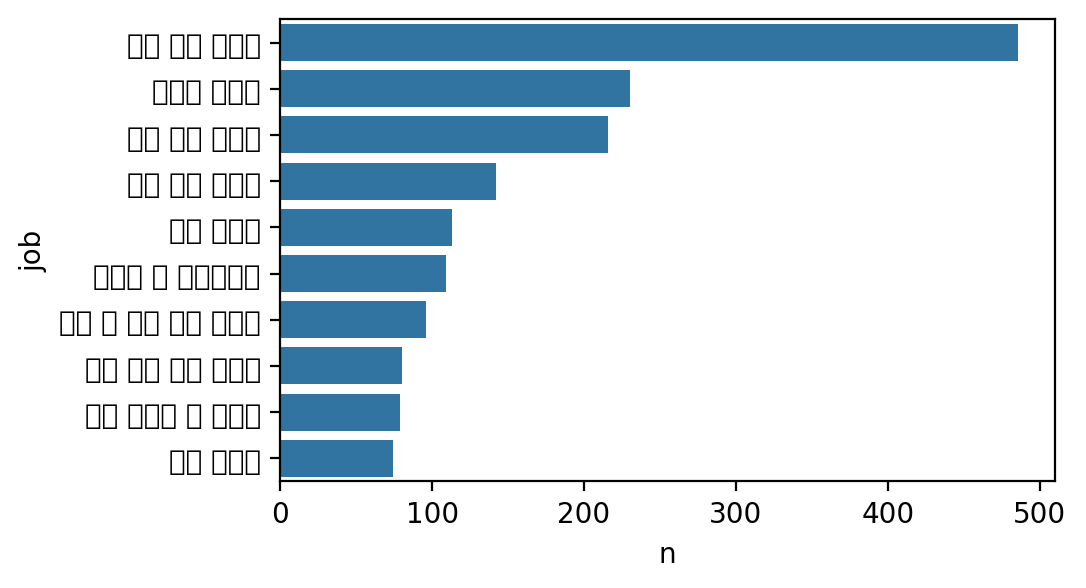

In [389]:
sns.barplot(job_male, x='n', y='job');

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47932 (\N{HANGUL SYLLA

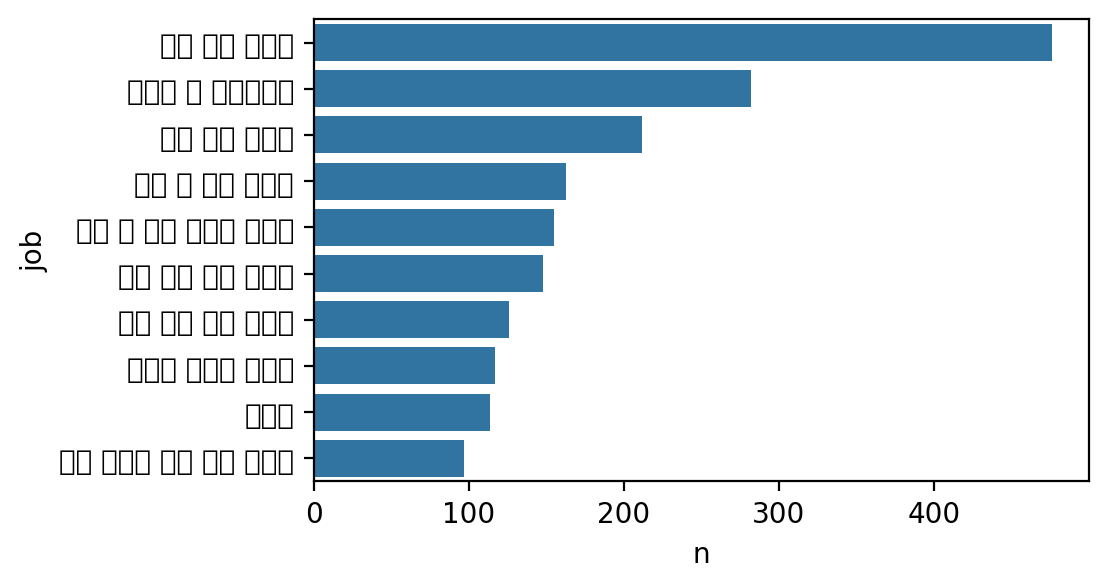

In [390]:
sns.barplot(job_female, x='n', y='job');

## 종교 유무에 따른 이혼율

In [391]:
welfare.religion.dtypes

dtype('float64')

In [392]:
welfare.religion.value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [393]:
welfare.religion.isna().sum()

0

In [394]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

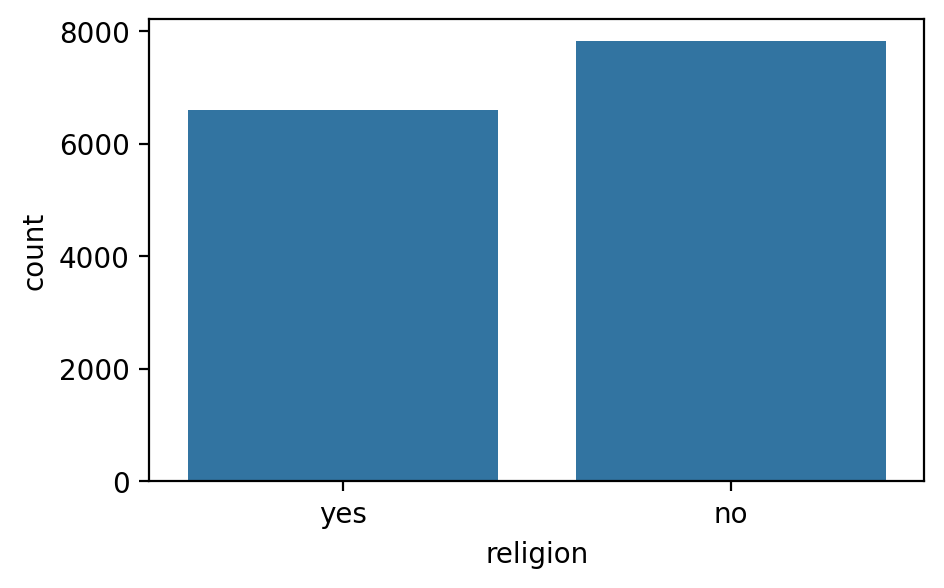

In [395]:
sns.countplot(welfare, x='religion');

In [396]:
welfare['marriage_type'].dtypes

dtype('float64')

In [397]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [398]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage', 
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))
welfare['marriage'].head()

0         etc
1         etc
2     divorce
3    marriage
4    marriage
Name: marriage, dtype: object

In [399]:
n_divorce = welfare.groupby('marriage', as_index=False) \
                   .agg( n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


In [400]:
welfare['marriage'].value_counts()

marriage
marriage    7190
etc         6539
divorce      689
Name: count, dtype: int64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

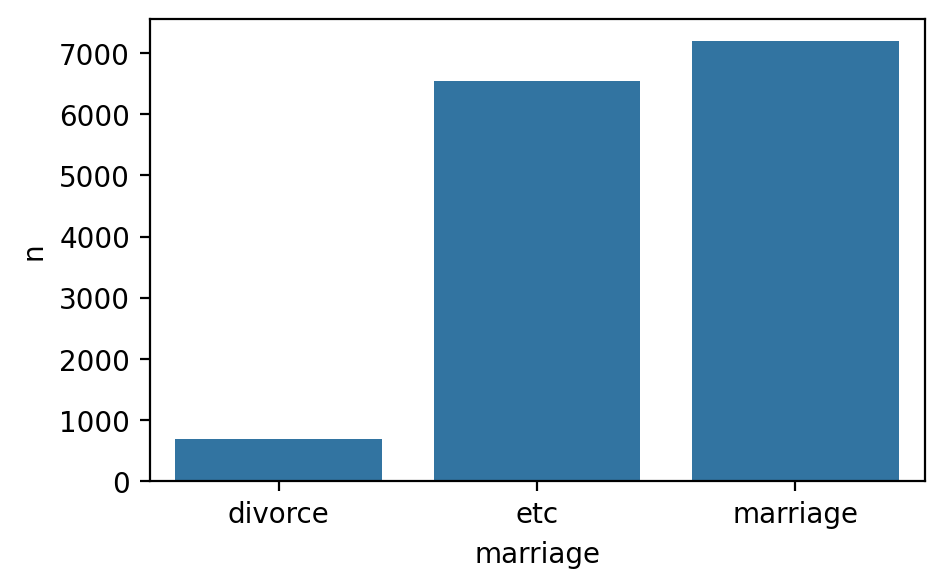

In [401]:
sns.barplot(n_divorce, x='marriage', y='n');

In [402]:
rel_div = welfare.query('marriage != "etc"') \
                .groupby('religion', as_index=False) \
                ['marriage'] \
                .value_counts()
rel_div

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [403]:
rel_div = welfare.query('marriage != "etc"') \
                .groupby('religion', as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


In [404]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100)
rel_div

,religion,marriage,proportion
1,no,divorce,9.50
3,yes,divorce,7.95


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

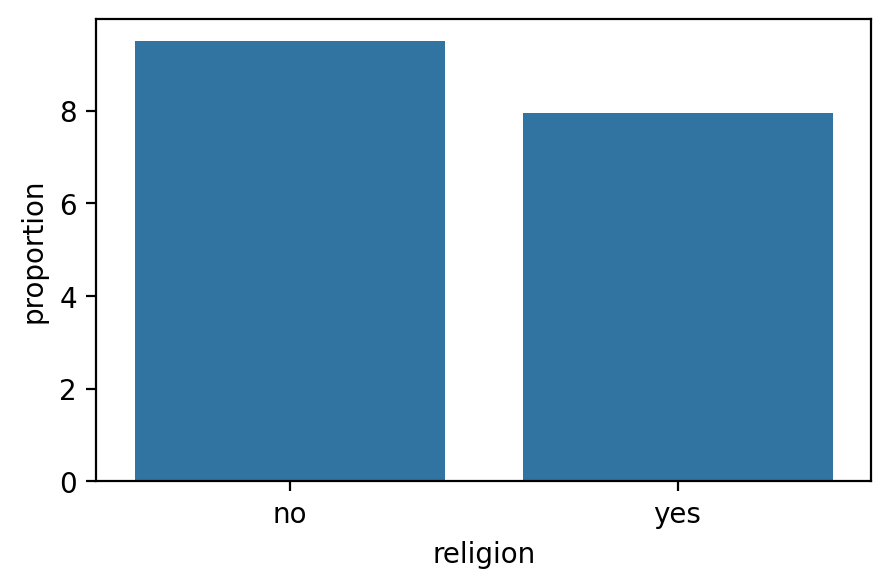

In [405]:
sns.barplot(rel_div, x='religion', y='proportion');

In [ ]:
age_div = welfare.query('marriage != "etc"') \
                .groupby('ageg', as_index=False) \
                ['marriage'] \
                .value_counts(normalize=True)  # 비율로 보여줘! 라는 의미!
age_div

,ageg,marriage,proportion
0,middle,marriage,0.91
1,middle,divorce,0.09
2,old,marriage,0.92
3,old,divorce,0.08
4,young,marriage,0.96
5,young,divorce,0.04


In [407]:
welfare.query('marriage != "etc"') \
                .groupby('ageg', as_index=False) \
                ['marriage'] \
                .value_counts()

,ageg,marriage,count
0,middle,marriage,3690
1,middle,divorce,376
2,old,marriage,3422
3,old,divorce,310
4,young,marriage,78
5,young,divorce,3


In [408]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.25
3,old,divorce,8.31


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

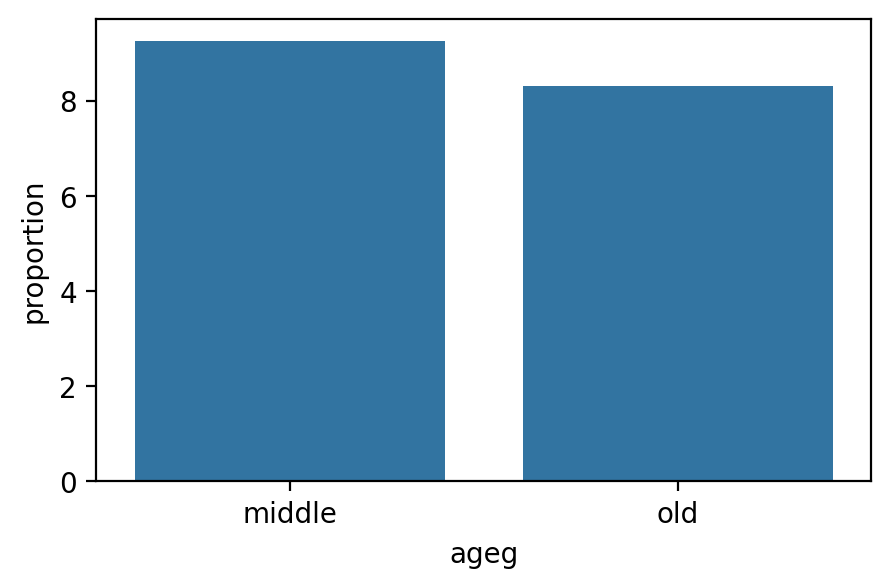

In [409]:
sns.barplot(age_div, x='ageg', y='proportion');

In [410]:
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index=False) \
                     ['marriage'] \
                     .value_counts(normalize=True)
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.90
1,middle,no,divorce,0.10
2,middle,yes,marriage,0.92
3,middle,yes,divorce,0.08
4,old,no,marriage,0.91
5,old,no,divorce,0.09
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


In [411]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                 .assign(proportion = age_rel_div['proportion'] * 100)
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.91
3,middle,yes,divorce,8.37
5,old,no,divorce,9.05
7,old,yes,divorce,7.70


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

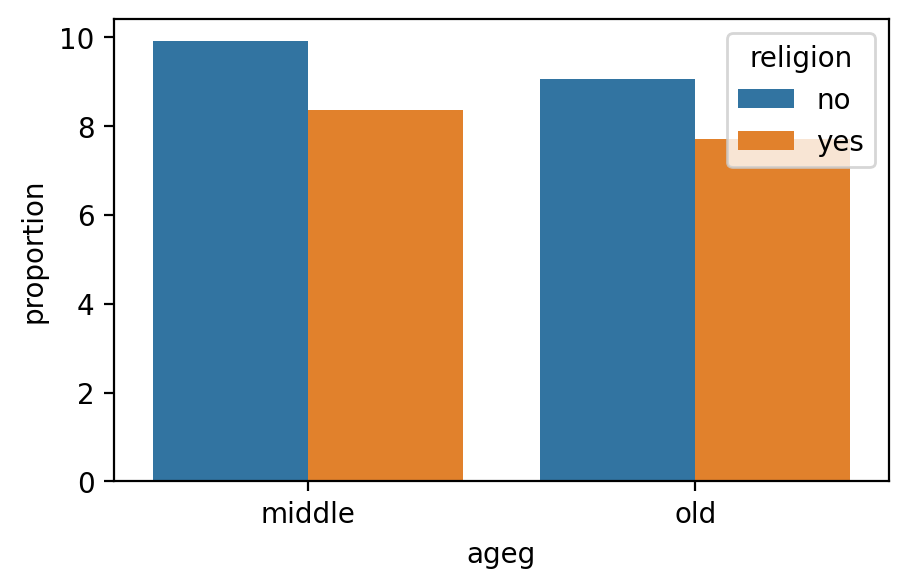

In [412]:
sns.barplot(age_rel_div, x='ageg', y='proportion', hue='religion');

## 지역별 연령대 비율

In [413]:
welfare.code_region.dtypes

dtype('float64')

In [414]:
welfare.code_region.value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [415]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [416]:
welfare = welfare.merge(list_region, how='left')
welfare[['code_region', 'region']].sample(5)

,code_region,region
4603,5.0,대전/충남
7774,6.0,강원/충북
8011,5.0,대전/충남
4829,5.0,대전/충남
11531,1.0,서울


In [417]:
region_ageg = welfare.groupby('region', as_index=False) \
                     ['ageg'] \
                     .value_counts(normalize=True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.44
1,강원/충북,middle,0.32
2,강원/충북,young,0.24
3,광주/전남/전북/제주도,old,0.44
4,광주/전남/전북/제주도,middle,0.32
5,광주/전남/전북/제주도,young,0.24
6,대구/경북,old,0.49
7,대구/경북,middle,0.30
8,대구/경북,young,0.21
9,대전/충남,old,0.40


In [418]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100)
region_ageg

,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48
5,광주/전남/전북/제주도,young,23.97
6,대구/경북,old,48.90
7,대구/경북,middle,30.44
8,대구/경북,young,20.66
9,대전/충남,old,40.12


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDL

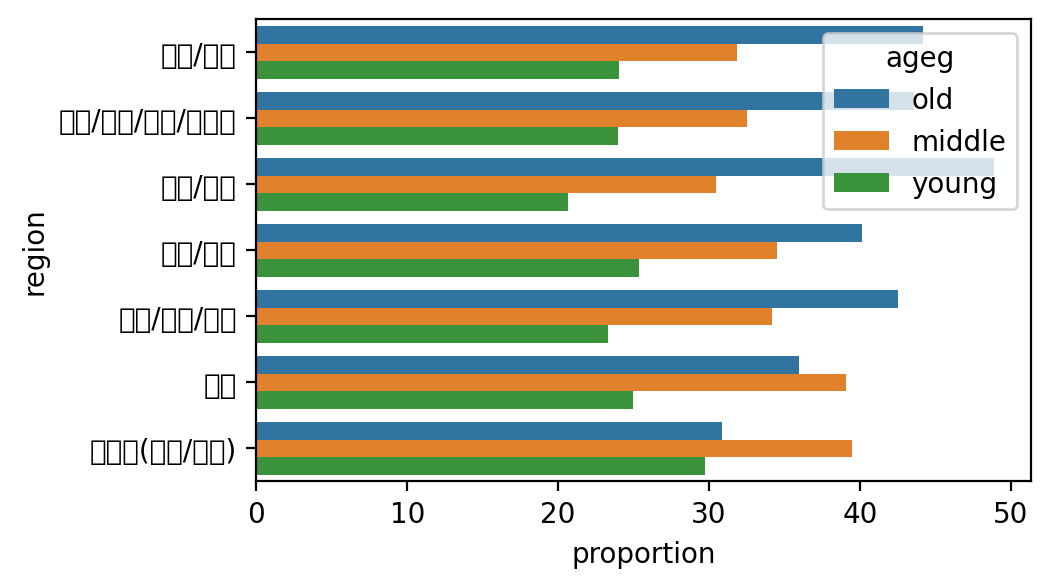

In [419]:
sns.barplot(region_ageg, y='region', x='proportion', hue='ageg');

In [420]:
region_ageg

,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48
5,광주/전남/전북/제주도,young,23.97
6,대구/경북,old,48.90
7,대구/경북,middle,30.44
8,대구/경북,young,20.66
9,대전/충남,old,40.12


## 피벗 테이블: 기말 예상 시험

In [ ]:
piv_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index='region', 
                                                             columns='ageg', 
                                                             values='proportion')
piv_df

# pivot 의 본질? --> 매개변수에 맞게끔 중복을 없애는것!

ageg,middle,old,young
region,,,
강원/충북,31.84,44.15,24.01
광주/전남/전북/제주도,32.48,43.55,23.97
대구/경북,30.44,48.90,20.66
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
서울,39.06,35.96,24.98
수도권(인천/경기),39.43,30.87,29.70


In [445]:
region_ageg[['region', 'ageg', 'proportion']]

,region,ageg,proportion
0,강원/충북,old,44.15
1,강원/충북,middle,31.84
2,강원/충북,young,24.01
3,광주/전남/전북/제주도,old,43.55
4,광주/전남/전북/제주도,middle,32.48
5,광주/전남/전북/제주도,young,23.97
6,대구/경북,old,48.90
7,대구/경북,middle,30.44
8,대구/경북,young,20.66
9,대전/충남,old,40.12


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLL

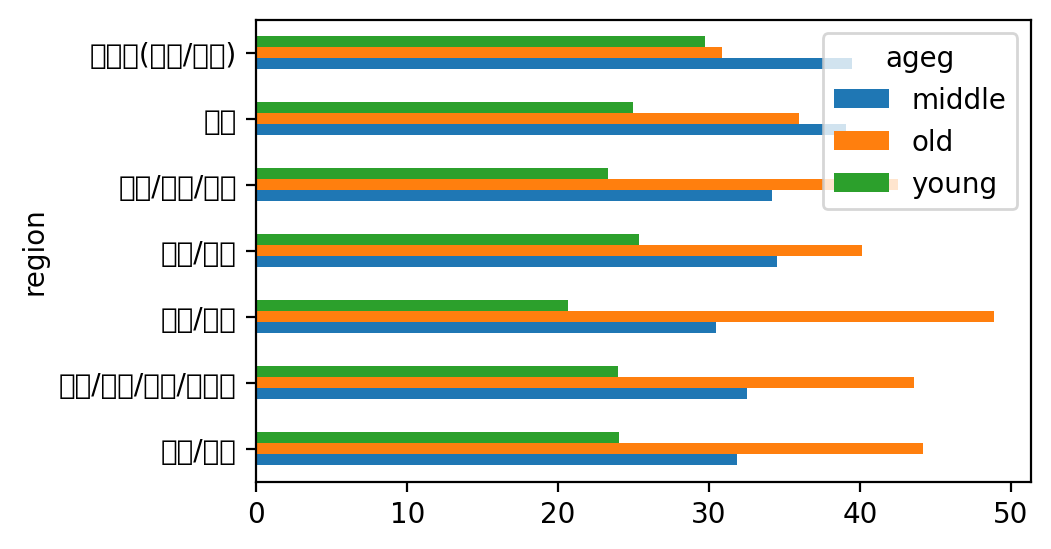

In [422]:
piv_df.plot.barh();

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLL

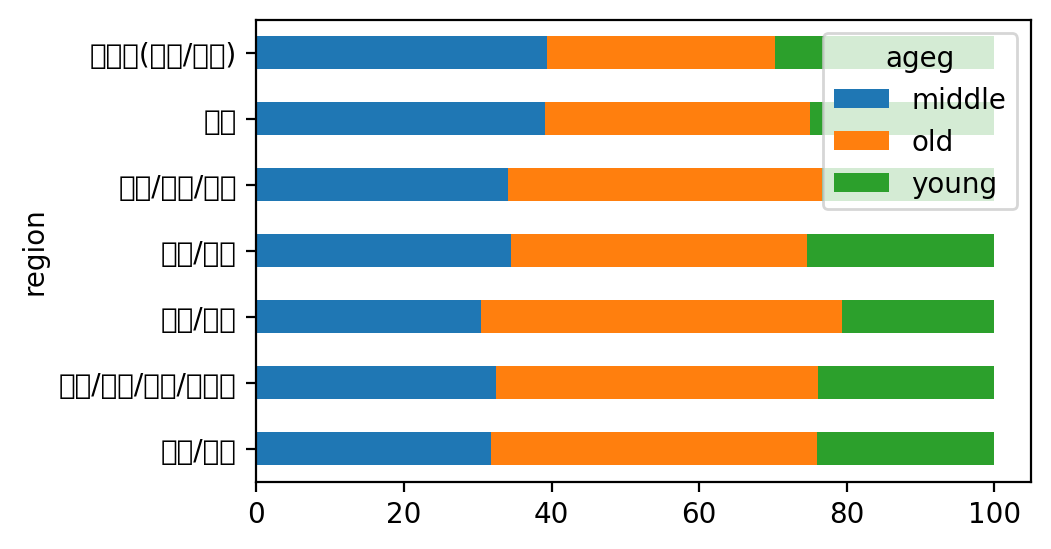

In [423]:
piv_df.plot.barh(stacked = True);

In [424]:
piv_df

ageg,middle,old,young
region,,,
강원/충북,31.84,44.15,24.01
광주/전남/전북/제주도,32.48,43.55,23.97
대구/경북,30.44,48.90,20.66
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
서울,39.06,35.96,24.98
수도권(인천/경기),39.43,30.87,29.70


In [425]:
piv_df.sort_values('old')

ageg,middle,old,young
region,,,
수도권(인천/경기),39.43,30.87,29.70
서울,39.06,35.96,24.98
대전/충남,34.51,40.12,25.38
부산/경남/울산,34.15,42.52,23.33
광주/전남/전북/제주도,32.48,43.55,23.97
강원/충북,31.84,44.15,24.01
대구/경북,30.44,48.90,20.66


In [426]:
piv_df.sort_values('old', ascending=False)

ageg,middle,old,young
region,,,
대구/경북,30.44,48.90,20.66
강원/충북,31.84,44.15,24.01
광주/전남/전북/제주도,32.48,43.55,23.97
부산/경남/울산,34.15,42.52,23.33
대전/충남,34.51,40.12,25.38
서울,39.06,35.96,24.98
수도권(인천/경기),39.43,30.87,29.70


In [ ]:
piv_df.sort_values('old', ascending=False)[['young', 'middle', 'old']]      # [['young', 'middle', 'old']]는 순서에 영향을 미칠 뿐!

ageg,young,middle,old
region,,,
대구/경북,20.66,30.44,48.90
강원/충북,24.01,31.84,44.15
광주/전남/전북/제주도,23.97,32.48,43.55
부산/경남/울산,23.33,34.15,42.52
대전/충남,25.38,34.51,40.12
서울,24.98,39.06,35.96
수도권(인천/경기),29.70,39.43,30.87


In [428]:
reorder_df = piv_df.sort_values('old', ascending=False)[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
대구/경북,20.66,30.44,48.90
강원/충북,24.01,31.84,44.15
광주/전남/전북/제주도,23.97,32.48,43.55
부산/경남/울산,23.33,34.15,42.52
대전/충남,25.38,34.51,40.12
서울,24.98,39.06,35.96
수도권(인천/경기),29.70,39.43,30.87


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLA

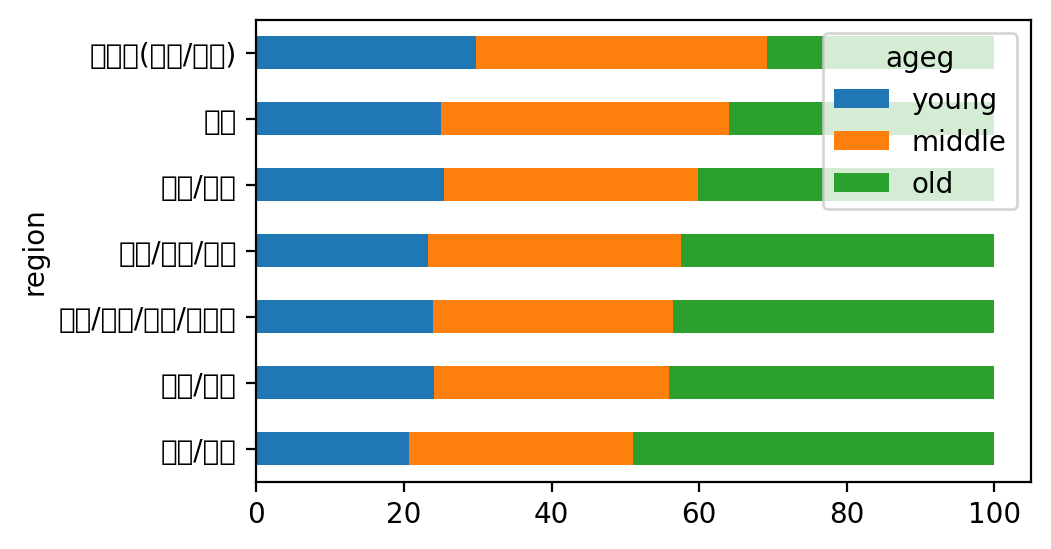

In [429]:
reorder_df.plot.barh(stacked=True);

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLA

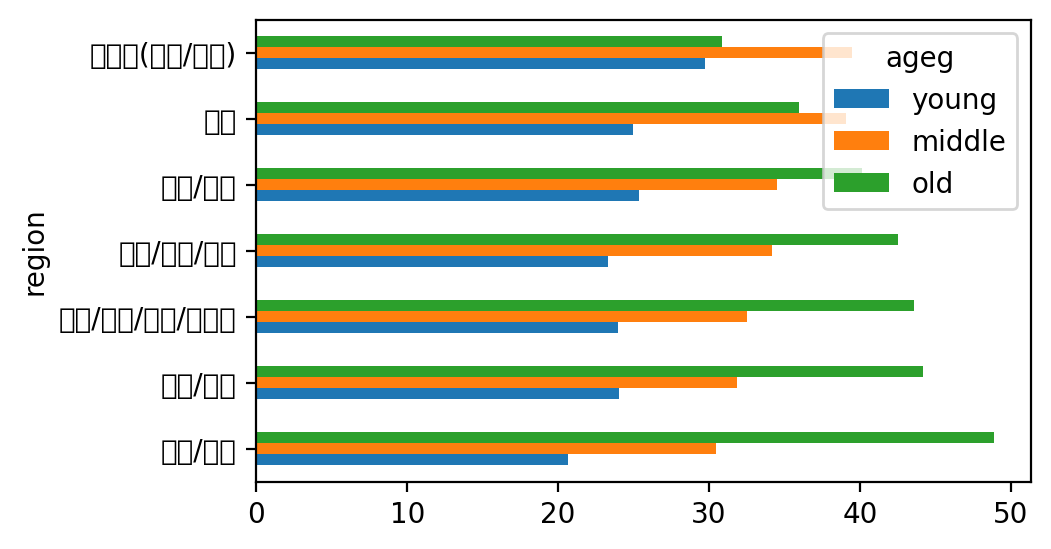

In [430]:
reorder_df.plot.barh();

In [431]:
reorder_df2 = piv_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df2

ageg,young,middle,old
region,,,
수도권(인천/경기),29.70,39.43,30.87
서울,24.98,39.06,35.96
대전/충남,25.38,34.51,40.12
부산/경남/울산,23.33,34.15,42.52
광주/전남/전북/제주도,23.97,32.48,43.55
강원/충북,24.01,31.84,44.15
대구/경북,20.66,30.44,48.90


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLAB

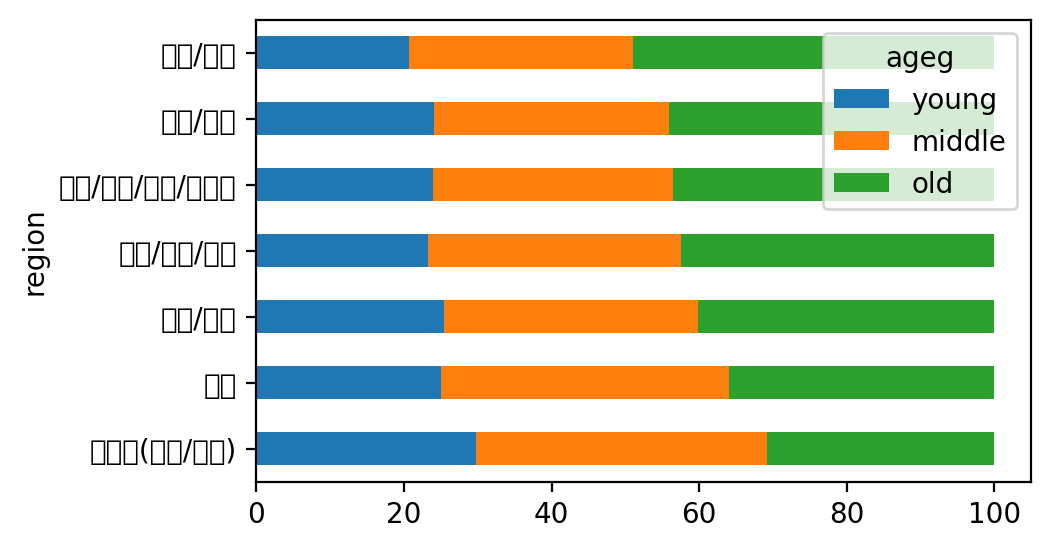

In [432]:
reorder_df2.plot.barh(stacked=True);

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/envs/VDLP/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLAB

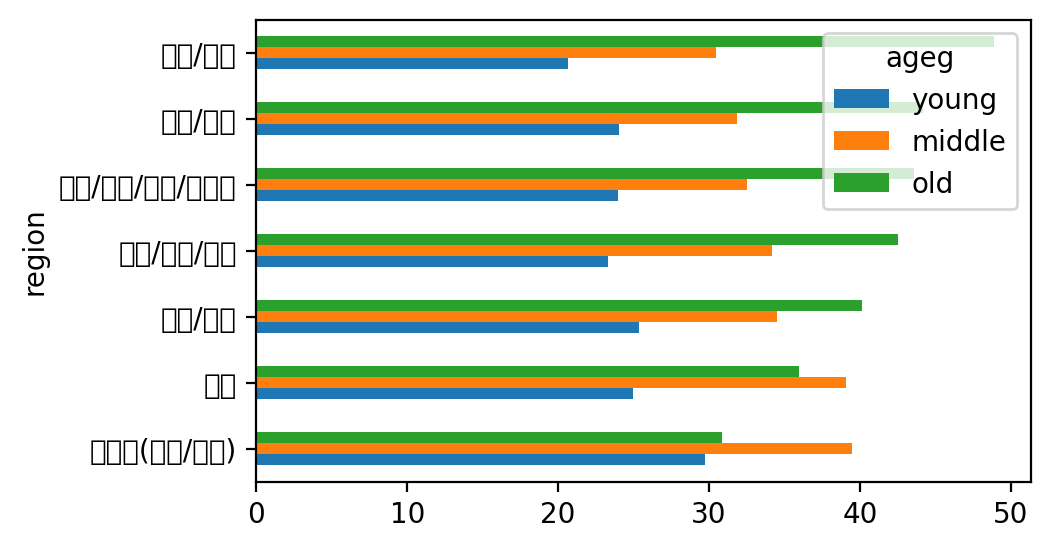

In [433]:
reorder_df2.plot.barh();

In [434]:
piv_df2 = region_ageg[['region', 'ageg', 'proportion']].pivot(index='ageg', 
                                                             columns='region', 
                                                             values='proportion')
piv_df2

region,강원/충북,광주/전남/전북/제주도,대구/경북,대전/충남,부산/경남/울산,서울,수도권(인천/경기)
ageg,,,,,,,
middle,31.84,32.48,30.44,34.51,34.15,39.06,39.43
old,44.15,43.55,48.90,40.12,42.52,35.96,30.87
young,24.01,23.97,20.66,25.38,23.33,24.98,29.70


In [435]:
piv_df2.index

Index(['middle', 'old', 'young'], dtype='object', name='ageg')

In [436]:
piv_df2.columns

Index(['강원/충북', '광주/전남/전북/제주도', '대구/경북', '대전/충남', '부산/경남/울산', '서울',
       '수도권(인천/경기)'],
      dtype='object', name='region')

## 종료